# Deep Learning
# DL08 Filtros Convolucionales


## <font color='blue'>**Capa convolucional.**</font>
<p style='text-align: justify;'>

En este notebook, visualizamos cuatro salidas filtradas (también conocidas como mapas de activación) de una capa convolucional.

En este ejemplo, *nosotros* estamos definiendo cuatro filtros que se aplican a una imagen de entrada inicializando los **pesos** de una capa convolucional, pero una CNN entrenada, la red aprenderá los valores de estos pesos.

![OverFitting](https://drive.google.com/uc?export=view&id=1tyI9a8do69Qzi9O0jQwZAsylz0lDIUfk)

La operación de convolución en capas 2D implica tomar un filtro (o kernel) y deslizarlo sobre la imagen de entrada. En cada posición del filtro sobre la imagen, se realiza una suma ponderada de los píxeles de la imagen que se encuentran debajo del filtro, y el resultado se coloca en la imagen de salida en la posición correspondiente.


Si $ I $ es la imagen y $ K $ es el kernel, entonces la convolución en una posición específica $ (x, y) $ se define como:


$$
\begin{equation}
(I * K)(x, y) = \sum_m \sum_n I(x + m, y + n)K(m, n)
\end{equation}
$$


donde las sumas se realizan sobre el ancho y alto del kernel.

$\textbf{Ejemplo de cálculo}:$

Supongamos que tenemos una pequeña imagen 3x3 y un filtro 2x2.

Imagen:

$ I = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{bmatrix} $

Filtro (kernel):


$
K = \begin{bmatrix}
-1 & 1 \\
2 & -2 \\
\end{bmatrix}
$

Para calcular la convolución en la posición $ (0,0) $ de la imagen de salida, tomamos la parte superior izquierda de la imagen que se superpone con el filtro y realizamos la suma ponderada:

$
\begin{equation}
(I * K)(1,1) = 1(-1) + 2(1) + 4(2) + 5(-2) = 2
\end{equation}
$

El proceso se repite para el siguiente píxel deslizando el filtro a la derecha y luego hacia abajo.

El resultado para toda la imagen sería:

$ O = \begin{bmatrix}
2 & 2 \\
2 & 2 \\
\end{bmatrix} $

Tenga en cuenta que, debido al tamaño del filtro, la imagen resultante es más pequeña que la imagen original en este ejemplo. Sin embargo, en la mayoría de las implementaciones modernas (como en PyTorch


![Convolucion](https://drive.google.com/uc?export=view&id=1SVRk5jwmBM_g_JhWgDUEbsc1B5k7oyVM)

### Importamos la imagen.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


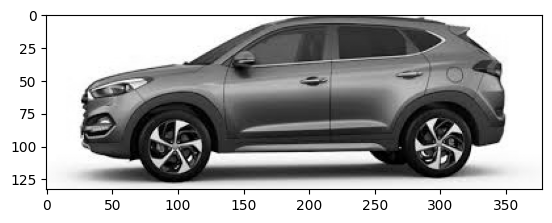

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Siéntase libre de probar sus propias imágenes aquí cambiando img_path
# a una ruta de archivo a otra imagen en su computadora.


img_path = "/content/drive/MyDrive/DATA SCIENCE UDD 2024/MODULO 7/Auto.jfif"
# load color image
bgr_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

# plot image
plt.imshow(gray_img, cmap='gray')
plt.show()

In [10]:
import torch
gray_img.shape[1]
# inicializamos peso con gray_img.shape[1]
weight = torch.randn(1, 1, gray_img.shape[1], gray_img.shape[0])

### Definamos los filtros.

In [3]:
import numpy as np

## Se puede modificar libremente. Estamos definiendo el operador de convolución.
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)


Filter shape:  (4, 4)


In [4]:
# Definiendo 4 filtros. Obtenidos desde `filter_vals`
# Definiendo los filtros.
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
# Añadimos una más para demostrar los resultados de un filtro distinto
filter_5 = np.array([[-1,   5,   5,   5],
                     [-1,  -1,   5,   5],
                     [-1,  -1,  -1,   5],
                     [-1,  -1,  -1,  -1]])
filters = np.array([filter_1, filter_2, filter_3, filter_4, filter_5])

# Miremos uno.
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


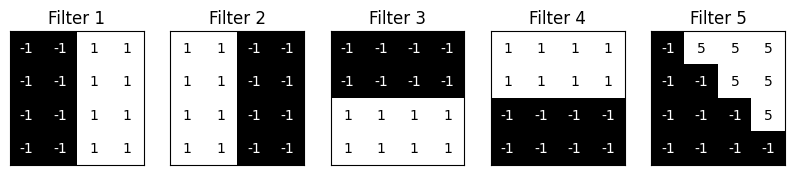

In [5]:
# Veamos todos los filtros.
fig = plt.figure(figsize=(10, 5))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

### Definamos una capa convolucional.


Partimos definiendo una capa Convolucional. Inicialice una sola capa convolucional para que contenga todos los filtros creados. Tenga en cuenta que no está entrenando esta red; ¡Está inicializando los pesos en una capa convolucional para que pueda visualizar lo que sucede después de un paso directo a través de esta red!


#### `__init__` and `forward`

Para definir una red neuronal en PyTorch, defina las capas de un modelo en la función `__init__` y defina el comportamiento hacia adelante de una red que aplica esas capas inicializadas a una entrada (` x`) en la función `forward`. En PyTorch, convertimos todas las entradas en el tipo de datos Tensor.

A continuación, se define la estructura de una clase llamada `Net` que tiene una capa convolucional que puede contener cuatro filtros de escala de grises 4x4.

## <font color='green'>**Actividad 1**</font>

En esta actividad queremos visualizar la salida de una capa convolucional. Para esto vamos a definir una capa convolucional y le vamos a asignar pesos de la siguiente forma:


```python
k_height, k_width = weight.shape[2:]
# Al crear la capa se indica que son 4 filtros.
self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
self.conv.weight = torch.nn.Parameter(weight) # Estamos asignando los pesos.
```

Luego realice al forward y devuelva  el resultado de aplicar la capa convolucional y y la capa aplicando la activación con relu.


Finalmente asigne los pesos de la siguiente forma.








In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, weight):
        super(Net, self).__init__()
        k_height, k_width = weight.shape[2:]
        self.conv = nn.Conv2d(1, 5, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight) # Estamos asignando los pesos.
    def forward(self, x):
        conv_x = self.conv(x)
        activated_x = F.relu(x)
        return conv_x, activated_x

weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)
print(model)

Net(
  (conv): Conv2d(1, 5, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


<font color='green'>Fin actividad 1</font>

### Vamos ahora a visualizar la salida de una capa.

Primero, definiremos una función auxiliar, `viz_layer` que toma una capa específica y una cantidad de filtros (argumento opcional), y muestra la salida de esa capa una vez que se ha pasado una imagen. Utilice el siguiente código.





In [23]:
# Funcion que permite visualizar la salida de una capa.
# Por defecto para 4 filtros.
def viz_layer(layer, n_filters= 5):
    fig = plt.figure(figsize=(20, 20))

    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # Guardar layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray') # LA transformamos al formato adecuado para visualizar.
        ax.set_title('Salida %s' % str(i+1))

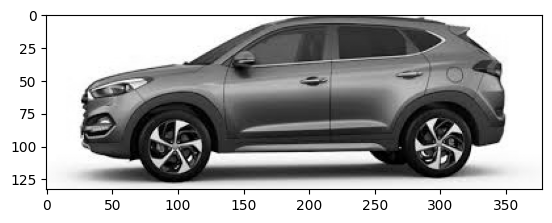

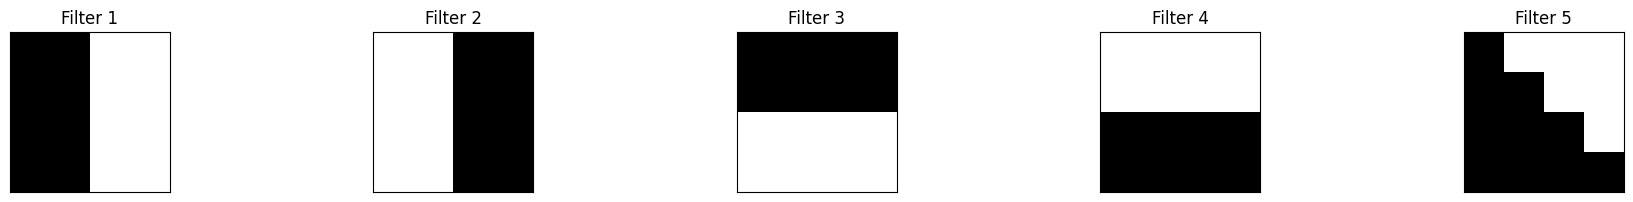

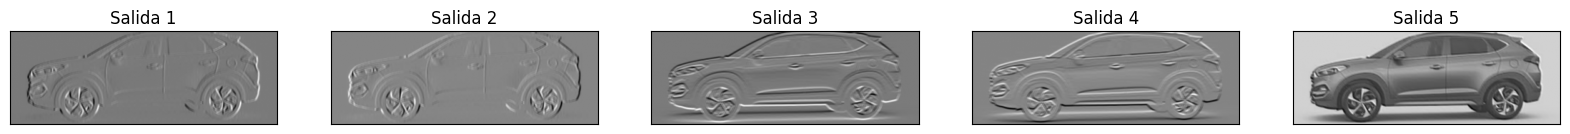

In [24]:
# Imagen original.
plt.imshow(gray_img, cmap='gray')

# Visualizando los filtros.
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))


# Convirtiendo a un tensor la imagen para ser procesada por la red.
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# Obtengamos las capas.
conv_layer, activated_layer = model(gray_img_tensor)

# Veamos la salida. SIn aplicar relu
viz_layer(conv_layer)

In [25]:
# (batch_size, channels, height, width)
gray_img_tensor.size()

torch.Size([1, 1, 133, 378])

### ReLu activation

En este modelo, hemos utilizado una función de activación que escala la salida de la capa convolucional. Hemos elegido una función ReLu para hacer esto, y esta función simplemente convierte todos los valores de píxeles negativos en ceros (negro). Consulte la ecuación que se muestra a continuación para ver los valores de píxeles de entrada, `x`.

<img alt="ReLu activation"  src="https://drive.google.com/uc?export=view&id=1gWJkNE9ohn0mR6EbKTCNNvIECt7Ko8Hl" width=600px>


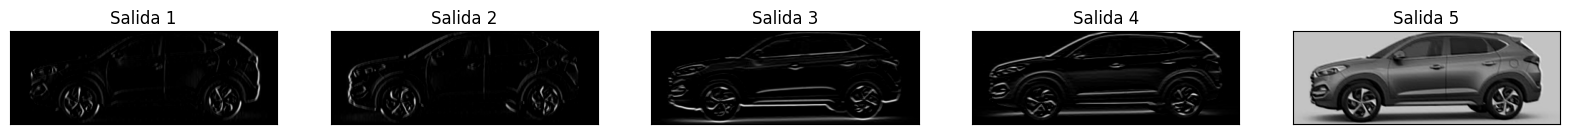

In [ ]:
# Aplicando Relu
viz_layer(activated_layer)

<font color='green'>Fin Actividad 1</font>

<img src="https://drive.google.com/uc?export=view&id=1DNuGbS1i-9it4Nyr3ZMncQz9cRhs2eJr" width="100" align="left" title="Runa-perth">
<br clear="left">

## <font color='green'>**La inspiracion del proceso de vision computacional**</font>

El trabajo de David Hubel y Torsten Wiesel en los años 50 y 60 del siglo pasado sentó las bases para nuestra comprensión de la fisiología visual y, eventualmente, inspiró avances en el campo de la visión artificial y el aprendizaje profundo. Sus experimentos, realizados principalmente en gatos, revolucionaron nuestra comprensión del procesamiento visual en el cerebro.


1. Experimentos de Hubel y Wiesel:

  a. Hubel y Wiesel introdujeron microelectrodos en la corteza visual de gatos para registrar la actividad de las neuronas individuales en respuesta a estímulos visuales específicos.

  b. Descubrieron células simples en la corteza visual primaria que respondían mejor a barras de luz orientadas en un ángulo particular. Estas células no responden tan bien si el ángulo de la barra cambia.

  c. También encontraron células complejas que también respondían a barras orientadas, pero eran más robustas con respecto a la posición exacta de la barra en el campo visual.

  d. Estos hallazgos sugirieron una jerarquía en el procesamiento visual: la información se procesa en etapas, con cada etapa agregando un nivel de complejidad al procesamiento.

2. Inspiración para Redes Neuronales:

  a. La idea de que el cerebro tiene neuronas especializadas para detectar características específicas se convirtió en la base para la idea de "detectores de características" en la visión artificial.

  b. Las células simples y complejas pueden considerarse como análogos a los filtros en las capas convolucionales de una red neuronal, que se activan en respuesta a características específicas (por ejemplo, bordes orientados en un ángulo particular).

3. Capas Profundas en Visión Artificial:

  a. Siguiendo la idea de un proceso jerárquico en el cerebro, las redes neuronales profundas (Deep Neural Networks, DNNs) se construyen con muchas capas, donde cada capa procesa características de nivel superior basadas en la salida de la capa anterior.

  b. En el contexto de la visión artificial, las primeras capas de una red neuronal convolucional (CNN) podrían aprender detectores de bordes (similar a las células simples), mientras que las capas más profundas podrían aprender a detectar formas complejas o incluso objetos completos (análogo a estructuras cerebrales más avanzadas que procesan información visual).

  c. Así, las redes neuronales profundas intentan imitar este proceso jerárquico, permitiendo que la red aprenda automáticamente características de nivel superior a partir de datos sin procesar.

### Beneficios del Max Pooling:

1. Reducción de Dimensionalidad: El Max Pooling reduce significativamente la cantidad de parámetros y cálculos en la red. Esto no solo ayuda a prevenir el sobreajuste sino que también acelera el entrenamiento.

2. Invariancia Espacial: El Max Pooling introduce cierta invariancia a la traslación. Si una característica es detectada en alguna parte de la imagen, su ubicación exacta se vuelve menos relevante, lo que permite a la CNN reconocer objetos independientemente de su posición exacta en la imagen.

3. Conservación de Características Importantes: Al tomar el valor máximo de una ventana, se está conservando la característica más prominente en esa región y descartando información no esencial.

## <font color='green'>**Actividad: Aplicar la operacion de convolucion a distintas imagenes y distintos filtros**</font>


Aplique filtros convolucionales a una imagen en escala de grises para ver cómo funciona la convolución.


### Filtro de deteccion de bordes
```
[[1, 0, -1],
 [1, 0, -1],
 [1, 0, -1]]
```

### Filtro blur
```
[[1/9, 1/9, 1/9],
 [1/9, 1/9, 1/9],
 [1/9, 1/9, 1/9]]
```

### Filtro Gaussiano

```
[[1, 2, 1],
 [2, 4, 2],
 [1, 2, 1]]
```

### Filtro Emboss
```
[[-2, -1, 0],
 [-1, 1, 1],
 [0, 1, 2]]
```

### Bordes en 45 grados
```
[[-1, 1, 1],
 [-1, -2, 1],
 [-1, 1, 1]]
```

### Bordes en 135 grados
```
[[1, 1, -1],
 [1, -2, -1],
 [1, 1, -1]]
```

### Bordes
```

[   [1, 2, 0, -2, -1],
    [1, 2, 0, -2, -1],
    [1, 2, 0, -2, -1],
    [1, 2, 0, -2, -1],
    [1, 2, 0, -2, -1]
]
```








## <font color='green'>**Actividad: Aplicación de diferentes funciones de activación tras convolución**</font>

Objetivo: Familiarizarse con el efecto de diferentes funciones de activación después de aplicar convolución en imágenes.

Utilizando PyTorch, carga una imagen de tu elección (preferentemente una en la que se puedan distinguir detalles y contrastes).

Define un filtro para la detección de bordes (puedes usar el filtro Sobel o cualquier otro que prefieras).

**Actividades:**
a. Aplica la convolución de la imagen con el filtro definido.

b. Aplica la siguiente lista de funciones de activación al resultado de la convolución:

  - ReLU
  - Sigmoid
  - Tanh
  - Leaky ReLU (puedes experimentar con diferentes valores para el parámetro de inclinación)

c. Visualiza la imagen original, el resultado de la convolución y el resultado tras aplicar cada función de activación.

**Preguntas:**

- ¿Qué efecto tiene cada función de activación en la imagen resultante?
- ¿Hay alguna función de activación que resalte mejor ciertas características de la imagen original después de la convolución? Si es así, ¿cuál y por qué?
- ¿Cómo cambiaría el resultado si se utiliza un filtro diferente?

Repite el proceso con diferentes filtros (por ejemplo, un filtro de realce o un filtro gaussiano) y compara los efectos de las funciones de activación en los resultados.

## <font color='green'>**Actividad: Aprendizaje de un filtro convolucional para detección de bordes**</font>

Objetivo: Entender cómo un filtro convolucional puede aprender a detectar características en imágenes a través del entrenamiento.


**Carga una imagen de tu elección en PyTorch.**

Utiliza un filtro Sobel (o cualquier otro filtro de detección de bordes) para generar una imagen "objetivo" con los bordes detectados.

Define un filtro convolucional de la misma dimensión que el filtro Sobel, pero inicialízalo con valores aleatorios. Este será el filtro que se entrenará.

**Proceso de aprendizaje:**

- Aplica el filtro convolucional (con valores aleatorios) a la imagen original para obtener una imagen "predicha".

- Calcula la pérdida como la diferencia al cuadrado entre la imagen "objetivo" (Sobel) y la imagen "predicha".

- Usa backpropagation y un optimizador (como SGD) para actualizar los valores del filtro convolucional y reducir la pérdida.

- Repite este proceso durante varias iteraciones (epochs) hasta que la pérdida converja a un valor mínimo.

**Visualización:**

- Muestra la imagen original, la imagen "objetivo" (Sobel) y la imagen "predicha" después del entrenamiento.

- Compara visualmente la imagen "objetivo" con la imagen "predicha" para evaluar qué tan bien aprendió el filtro a detectar bordes.

**Preguntas:**

- ¿Cómo se compara la imagen "predicha" con la imagen "objetivo"?
- ¿Qué ocurre si se cambia la imagen original por otra diferente y se aplica el filtro entrenado? ¿Detecta correctamente los bordes?
- ¿Qué sucede si se inicializa el filtro con diferentes valores aleatorios y se repite el proceso de entrenamiento?

**Adicional**

Experimenta entrenando el filtro con diferentes imágenes y compara los resultados. ¿Puede un filtro aprender a detectar bordes de manera generalizada en diferentes imágenes?

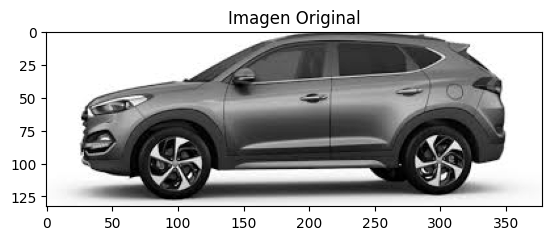

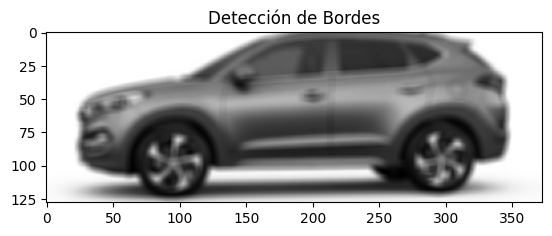

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import cv2

# Cargar imagen en escala de grises
img = cv2.imread('/content/drive/MyDrive/Curso/Industria Inteligente/2023-2S/Datos/Auto.jfif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title("Imagen Original")
plt.show()

# Convertir la imagen a tensor y añadir dimensiones adicionales
img_tensor = torch.from_numpy(img).float().unsqueeze(0).unsqueeze(1)

# Definir un filtro de detección de bordes
#filter_edge = torch.Tensor([[1, 0, -1],
#                            [1, 0, -1],
#                            [1, 0, -1]])

#filter_edge = torch.Tensor([[-1, 1, 1],
#                            [-1, -2, 1],
#                            [-1, 1, 1]])

filter_edge = torch.Tensor([[1/36, 1/36, 1/36, 1/36, 1/36, 1/36],
                            [1/36, 1/36, 1/36, 1/36, 1/36, 1/36],
                            [1/36, 1/36, 1/36, 1/36, 1/36, 1/36],
                            [1/36, 1/36, 1/36, 1/36, 1/36, 1/36],
                            [1/36, 1/36, 1/36, 1/36, 1/36, 1/36],
                            [1/36, 1/36, 1/36, 1/36, 1/36, 1/36]])

conv = nn.Conv2d(1, 1, kernel_size=(6, 6), bias=False)
conv.weight.data = filter_edge.unsqueeze(0).unsqueeze(1)

# Aplicar el filtro
output = conv(img_tensor)

# Mostrar el resultado
plt.imshow(output[0, 0].detach().numpy(), cmap='gray')
plt.title("Detección de Bordes")
plt.show()


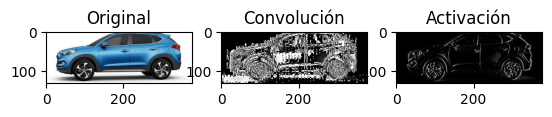

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Cargar la imagen y convertirla a tensor
transform = transforms.Compose([
    transforms.Grayscale(),  # Convertir a escala de grises para simplificar
    transforms.ToTensor()
])
img_path = '/content/drive/MyDrive/Curso/Industria Inteligente/2023-2S/Datos/Auto.jfif'
image = Image.open(img_path)
tensor_image = transform(image).unsqueeze(0)  # Añadir una dimensión para el batch

# Definir un filtro (por ejemplo, un filtro Sobel para detección de bordes)
sobel_filter = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=torch.float32)
sobel_filter = sobel_filter.unsqueeze(0).unsqueeze(0)

# Aplicar convolución
output = F.conv2d(tensor_image, sobel_filter, padding=1)

# Aplicar función de activación (ejemplo: ReLU)
activated_output = F.relu(output)

# Visualizar resultados
def tensor_to_image(tensor):
    # Convertir el tensor a una imagen de PIL para visualizar
    return transforms.ToPILImage()(tensor.squeeze())

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")

# Resultado de la convolución
plt.subplot(1, 3, 2)
plt.imshow(tensor_to_image(output), cmap='gray')
plt.title("Convolución")

# Resultado después de la función de activación
plt.subplot(1, 3, 3)
plt.imshow(tensor_to_image(activated_output), cmap='gray')
plt.title("Activación")

plt.show()


Epoch 0/5000, Loss: 10.835894584655762
Epoch 100/5000, Loss: 0.25417113304138184
Epoch 200/5000, Loss: 0.22930456697940826
Epoch 300/5000, Loss: 0.20752228796482086
Epoch 400/5000, Loss: 0.1883482038974762
Epoch 500/5000, Loss: 0.17139291763305664
Epoch 600/5000, Loss: 0.15633603930473328
Epoch 700/5000, Loss: 0.1429123878479004
Epoch 800/5000, Loss: 0.13090167939662933
Epoch 900/5000, Loss: 0.12011988461017609
Epoch 1000/5000, Loss: 0.11041241884231567
Epoch 1100/5000, Loss: 0.10164866596460342
Epoch 1200/5000, Loss: 0.09371771663427353
Epoch 1300/5000, Loss: 0.0865248441696167
Epoch 1400/5000, Loss: 0.07998873293399811
Epoch 1500/5000, Loss: 0.0740390494465828
Epoch 1600/5000, Loss: 0.06861473619937897
Epoch 1700/5000, Loss: 0.063662588596344
Epoch 1800/5000, Loss: 0.05913587659597397
Epoch 1900/5000, Loss: 0.0549934096634388
Epoch 2000/5000, Loss: 0.05119872838258743
Epoch 2100/5000, Loss: 0.04771946743130684
Epoch 2200/5000, Loss: 0.04452679306268692
Epoch 2300/5000, Loss: 0.041594

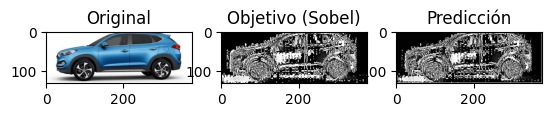

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Cargar imagen y convertirla a tensor
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor()
])
img_path = '/content/drive/MyDrive/Curso/Industria Inteligente/2023-2S/Datos/Auto.jfif'
image = Image.open(img_path)
tensor_image = transform(image).unsqueeze(0)  # Añadir dimensión para el batch

# Generar imagen objetivo usando filtro Sobel
sobel_filter = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=torch.float32)
sobel_filter = sobel_filter.unsqueeze(0).unsqueeze(0)
target = nn.functional.conv2d(tensor_image, sobel_filter, padding=1)

# Definir filtro convolucional a entrenar, inicializado aleatoriamente
learning_filter = nn.Parameter(torch.randn_like(sobel_filter))

# Definir optimizador
optimizer = optim.SGD([learning_filter], lr=0.01)

# Función de pérdida
loss_fn = nn.MSELoss()

# Entrenar el filtro
num_epochs = 5000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = nn.functional.conv2d(tensor_image, learning_filter, padding=1)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{num_epochs}, Loss: {loss.item()}")

# Visualizar resultados
def tensor_to_image(tensor):
    return transforms.ToPILImage()(tensor.squeeze())

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(tensor_to_image(target), cmap='gray')
plt.title("Objetivo (Sobel)")

plt.subplot(1, 3, 3)
plt.imshow(tensor_to_image(output.detach()), cmap='gray')
plt.title("Predicción")

plt.show()


In [ ]:
output.shape

torch.Size([1, 1, 133, 378])

In [ ]:
print("Kernel entrenado:")
print(learning_filter)


[[-1, 0, 1],
 [-2, 0, 2],
  [-1, 0, 1]]

Kernel entrenado:
Parameter containing:
tensor([[[[-0.5382, -1.4039,  2.0358],
          [-1.8158,  0.3607,  1.2879],
          [-0.6387, -0.1004,  0.8217]]]], requires_grad=True)


[[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]